In [ ]:
#!pip install git+https://github.com/csebuetnlp/normalizer

In [ ]:
#!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

In [ ]:

# বাংলাদেশ

In [ ]:
#!pip install mss

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.3 MB/s eta 0:00:00


In [ ]:
!pip install bnlp_toolkit

In [ ]:
from bnlp import NLTKTokenizer
tokenizer = NLTKTokenizer()

In [ ]:
from bnlp import NLTKTokenizer
import string
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=True,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)


def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Read story and novel text
story_text = read_file('/content/storty_text.txt')
novel_text = read_file('/content/novel_text.txt')
poem_text = read_file('/content/poem_text.txt')
stp_word = read_file('/content/benglai_stopwords.txt')
# Combine the text for training
combined_text = story_text + '\n' + novel_text + '\n' + poem_text + '\n' + stp_word + '>'

clean_text = clean_text(combined_text)
print(combined_text[:50])
#print(clean_text[:50])
# Tokenization using bnlp_toolkit
new_poem_txt = combined_text.replace('\n', ' লাইনশেষ ')
new_poem_txt = new_poem_txt.replace('...', ' কবিতাশেষ ')

tokenizer = NLTKTokenizer()
tokenized_text = tokenizer.word_tokenize(new_poem_txt)

# Example of tokenized text
print(tokenized_text[:500])  # Displaying the first 5 tokens



punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


বাংলাদেশের আকাশে আজ চাঁদ দেখা যায় নি।
হাফ ছেড়ে বাঁ
['বাংলাদেশের', 'আকাশে', 'আজ', 'চাঁদ', 'দেখা', 'যায়', 'নি', '।', 'লাইনশেষ', 'হাফ', 'ছেড়ে', 'বাঁচলাম', '।', 'একটা', 'দিন', 'অতিরিক্ত', 'পাওয়া', 'গেল', '।', 'আজ', 'শরীর', 'কুলাচ্ছে', 'না', '।', 'কিছু', 'কেনাকাটা', 'বাকী', 'ছিল', ',', 'বউ', 'এর', 'শাড়ি', 'চেঞ্জ', 'করতে', 'হবে', '।', 'সব', 'কাল', 'করা', 'যাবে', '।', 'আপাতত', 'হাতে', 'ধরা', 'মাছ', 'নিয়েই', 'বাড়ি', 'ফেরা', 'যাক', '।', 'লাইনশেষ', 'বাড়িতে', 'পা', 'রেখে', 'বুঝলাম', 'বেজায়', 'ভুল', 'হয়ে', 'গেছে', '।', 'এই', 'রাতে', 'মাছ', 'ক্রয়', 'করার', 'ব্যাপারটা', 'আমার', 'স্ত্রী', 'মোটেও', 'স্বাভাবিক', 'ভাবে', 'নেয়', 'নি', '।', 'কোন', 'নারীই', 'রাতে', 'মাছ', 'ক্রয়কে', 'ভালো', 'চোখে', 'দেখে', 'না', '।', 'রাত্রীকালীন', 'মাছ', 'সংসারের', 'সুখ-শান্তি', 'নাশক', '।', 'এই', 'একই', 'বিষয়-বস্তু', 'নিয়ে', 'বাবা-মার', 'মধ্যেও', 'কথা', 'কাটাকাটি', 'কম', 'হয়', 'নি', '।', 'এইসব', 'দেখেই', 'আমি', 'বড়', 'হয়ছি', 'এবং', 'কোন', 'এক', 'কুক্ষণে', 'নিজেই', 'সেই', 'ভুল', 'করে', 'বসেছি', '।', 'লাইনশেষ', 'প্রতিটি', '

In [ ]:
word_index = {word: index for index, word in enumerate(set(tokenized_text), start=1)}

In [ ]:
import json

# Your dictionary
my_dict = word_index

# Save the dictionary to a file
with open('word_index.json', 'w') as json_file:
    json.dump(my_dict, json_file)


In [ ]:
tokenized_text = [token.replace('লাইনশেষ', 'লাইনশেষ').replace('কবিতাশেষ', 'কবিতাশেষ') for token in tokenized_text]
#tokenized_text[:50]

In [ ]:
word_to_find = 'লাইনশেষ'
if word_to_find in word_index:
    end_token_id =word_index[word_to_find]

end_token_id

4869

In [ ]:
word_to_find = '।'
if word_to_find in word_index:
    token_id =word_index[word_to_find]

token_id

13922

In [ ]:
word_to_find = '>'
if word_to_find in word_index:
    start_token_id =word_index[word_to_find]

start_token_id

17

In [ ]:
predicted_word = [word for word, index in word_index.items() if index == 11180]
predicted_word

['কবিতাশেষ']

In [ ]:
from gensim.models import Word2Vec

# Define and train Word2Vec model
model = Word2Vec(sentences=[tokenized_text], vector_size=50, window=3, min_count=1, workers=5, sg=0, epochs=100)

# Save the trained model
model.save('word2vec_com_cbow_v24.bin')


In [ ]:
vocab = list(model.wv.index_to_key)
vectors = model.wv[vocab]

len(vectors)

17491

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
!apt-get -qq install -y fonts-beng


Selecting previously unselected package fonts-beng-extra.
(Reading database ... 121671 files and directories currently installed.)
Preparing to unpack .../fonts-beng-extra_3.2.1-1_all.deb ...
Unpacking fonts-beng-extra (3.2.1-1) ...
Selecting previously unselected package fonts-lohit-beng-assamese.
Preparing to unpack .../fonts-lohit-beng-assamese_2.91.5-2_all.deb ...
Unpacking fonts-lohit-beng-assamese (2.91.5-2) ...
Selecting previously unselected package fonts-lohit-beng-bengali.
Preparing to unpack .../fonts-lohit-beng-bengali_2.91.5-2_all.deb ...
Unpacking fonts-lohit-beng-bengali (2.91.5-2) ...
Selecting previously unselected package fonts-beng.
Preparing to unpack .../fonts-beng_2%3a1.3_all.deb ...
Unpacking fonts-beng (2:1.3) ...
Setting up fonts-lohit-beng-bengali (2.91.5-2) ...
Setting up fonts-beng-extra (3.2.1-1) ...
Setting up fonts-lohit-beng-assamese (2.91.5-2) ...
Setting up fonts-beng (2:1.3) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


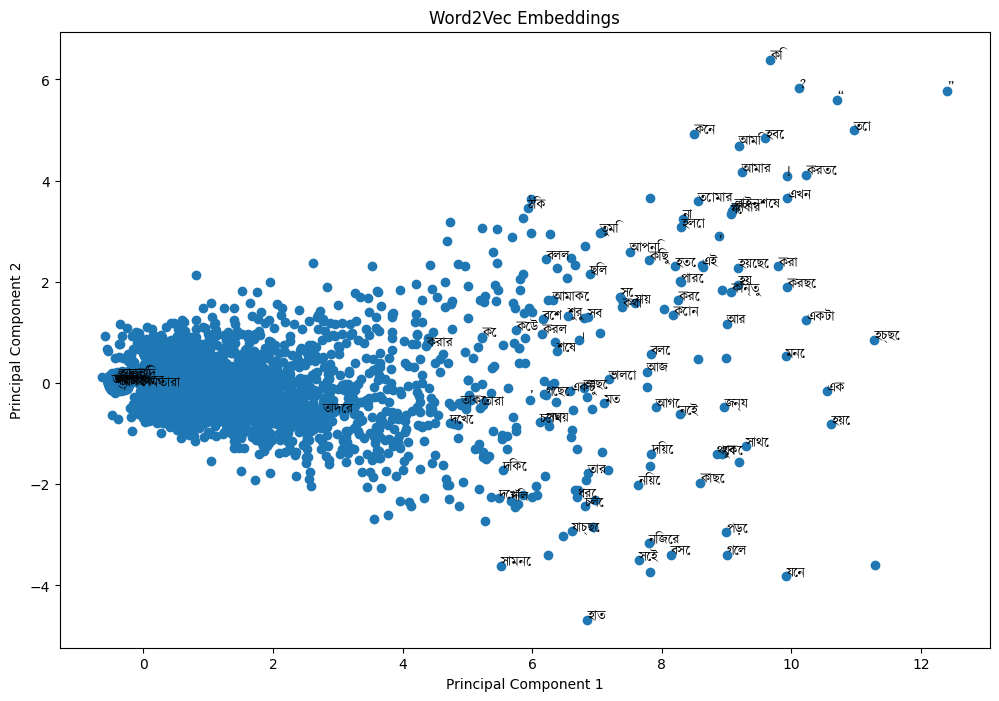

Vocabulary: ['।', 'লাইনশেষ', ',', 'না', '?', '“', '”', 'করে', 'তার', 'সে', 'এই', 'থেকে', 'আমি', 'মনে', 'আর', 'কথা', 'আমার', 'আছে', 'একটা', 'যেন', 'কোন', 'হবে', 'কি', 'কিন্তু', 'সাথে', 'হয়ে', 'হচ্ছে', 'করতে', 'নিয়ে', 'বলে', 'সেই', '!', 'গেল', 'হয়', 'জন্য', 'এক', 'নেই', 'যে', 'কিছু', 'দিয়ে', 'দিকে', 'মত', 'সব', 'করছে', 'হয়েছে', 'কী', 'করল', 'দ্বিরেফ', 'খুব', 'হলো', 'তো', 'যায়', 'আলকানতারা', 'তোমার', 'ছিল', 'গেছে', 'করা', 'যাচ্ছে', 'ওয়ালিদ', 'কেউ', 'আবার', 'সময়', 'এখন', 'আপনি', 'আমাকে', 'চোখ', 'সামনে', 'নিজের', 'বেশ', 'কেন', ';', 'বসে', 'আলফি', 'তাকে', 'দিল', 'তাদের', 'দ্বিরেফের', 'বলল', 'চলে', 'তুমি', 'কাছে', 'শুরু', 'শেষ', 'আগে', 'হাত', 'ভালো', 'ঠিক', 'দেখে', 'হতে', 'দেখা', '’', 'আজ', 'করার', 'একটু', 'পড়ে', 'কে', 'তারা', 'ধরে', 'পারে', 'ডাবরির', 'করেছে', 'এমন', 'দাঁড়িয়ে', 'মানুষ', 'যাবে', 'মুখে', 'তাই', 'আপনার', 'নয়', 'কাজ', 'চোখে', 'নৈঋত', 'মুখ', 'থাকে', 'পর', 'মাথা', 'বের', 'হাতে', 'প্রশ্ন', 'তবে', 'দিতে', 'বড়', 'কখনো', 'হঠাৎ', 'ফিকটাস', 'শুধু', 'বুঝতে', 'তা', 'অনেক', 'বাড়ি', 'এসে', '

In [ ]:
vocab = list(model.wv.index_to_key)
vectors = model.wv[vocab]

# Reduce the dimensionality using PCA for plotting
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot the Word2Vec embeddings
plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])
plt.rcParams['font.family'] =  'DejaVu Sans'
# Annotate each point with the corresponding word
prop = fm.FontProperties(fname='kalpurush.ttf')
for i, word in enumerate(vocab[:100]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]),fontproperties=prop)

plt.title('Word2Vec Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the vocabulary
print("Vocabulary:", vocab)

In [ ]:
#vocab
def find_similar_words(word, topn=5):
    similar_words = model.wv.similar_by_word(word, topn=topn)
    return similar_words

In [ ]:
#!pip install bnlp_toolkit
similar = find_similar_words('সে', topn=5)
similar

[('পেল', 0.969700813293457),
 ('ওসব', 0.9695905447006226),
 ('কোথায়', 0.9536568522453308),
 ('কতদিন', 0.9482546448707581),
 ('চূর্ণবিচূর্ণ', 0.9424494504928589)]

In [ ]:
#!pip install bnlp_toolkit
similar = find_similar_words('লাইনশেষ', topn=10)
similar

[('জ্বি।', 0.9862616658210754),
 ('”', 0.9840666055679321),
 ('স্যার', 0.9802067279815674),
 ('স্যার…', 0.9718302488327026),
 ('লুকিয়ে', 0.9704017043113708),
 ('ভুগছেন', 0.9697463512420654),
 ('মাস।', 0.9686223864555359),
 ('সিদ্ধান্তহীনতায়', 0.9675377011299133),
 ('খেয়েছি', 0.9672414064407349),
 ('চার', 0.9663671851158142)]

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.utils import to_categorical
import json

In [ ]:
def load_text_data(file_path):
    """
    Load text data from a TXT file.

    Parameters:
    - file_path (str): The path to the TXT file.

    Returns:
    - str: The text data read from the file.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data = file.read()
        return text_data
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'.")
        return None
    except Exception as e:
        print(f"Error: Unable to read the file at '{file_path}'.")
        print(f"Details: {e}")
        return None

In [ ]:
def load_bengali_stopwords(file_path):
    """
    Load Bengali stopwords from a TXT file.

    Parameters:
    - file_path (str): The path to the TXT file containing stopwords.

    Returns:
    - list: The list of Bengali stopwords.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            stopwords = file.read().splitlines()
        return stopwords
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'.")
        return None
    except Exception as e:
        print(f"Error: Unable to read the file at '{file_path}'.")
        print(f"Details: {e}")
        return None

In [ ]:
# Load your Word2Vec model
word2vec_model = Word2Vec.load("/content/word2vec_com_cbow_v24.bin")

# Load and preprocess your text data
story_text = load_text_data("/content/storty_text.txt")
novel_text = load_text_data("/content/novel_text.txt")
poem_text = load_text_data("/content/poem_text.txt")

bengali_stopwords = load_bengali_stopwords("/content/benglai_stopwords.txt")

#tokenizer = NLTKTokenizer()

# Tokenize using bnlp and NLTK tokenizer
#story_tokens = tokenizer.word_tokenize(story_text)
#novel_tokens = tokenizer.word_tokenize(novel_text)
#poem_tokens = tokenizer.word_tokenize(poem_text)

In [ ]:
poem_text = poem_text.replace('\n', ' লাইনশেষ ').replace('...', ' কবিতাশেষ ')


In [ ]:
# Load the dictionary from the file
with open('/content/word_index.json', 'r') as json_file:
    word_index = json.load(json_file)




In [ ]:
embedding_layer_weights = word2vec_model.wv.vectors
embedding_layer_weights.shape

(17491, 50)

In [ ]:
#embedding_layer_weights.dump('embedder_weights.pkl')

embedding_layer_weights.shape

(17491, 10)

In [ ]:
# Add sentence-ending markers
#story_tokens += bengali_stopwords + ["\n"]
#novel_tokens += bengali_stopwords + ["\n"]
#poem_tokens += bengali_stopwords + ["\n"]

#all_tokens = story_tokens + novel_tokens + poem_tokens


In [ ]:
#len(all_tokens)
    # Create a word-to-index mapping
#word_index = {word: index for index, word in enumerate(set(all_tokens), start=1)}
#len(word_index)
#peom sequences creation
tknizer = NLTKTokenizer()
word_index = word_index
inp_seq =[]

tokens = tokenizer.word_tokenize(poem_text)
tokens = [word for word in tokens if word in word_index]
replaced_text = ' '.join(str(word_index.get(word, word)) for word in tokens)
token_list = []
current_sequence = []

for token in replaced_text.split():
  add_token = int(token)
  token_list.append(add_token)

for token_id in token_list:
  #print(token_id)

  current_sequence.append(token_id)

    # Check if the current token ID is one of the ending tokens
  if token_id == end_token_id:
        # Add the current sequence to the list of sequences
    inp_seq.append(current_sequence)

    current_sequence = []

        # Start a new sequence



In [ ]:
vocab_size = len(word_index)
vocab_size

17491

In [ ]:
import random
inp_seq
# Number of random sequences to add
num_random_sequences = 200

# Randomly select lines from inp_seq and target_seq
selected_input_sequences = random.sample(inp_seq, num_random_sequences)
#selected_target_sequences = random.sample(target_seq, num_random_sequences)

# Add selected sequences back to inp_seq and target_seq
inp_seq += selected_input_sequences
#target_seq += selected_target_sequences
#inp_seq = random.sample(inp_seq, 1000)
modified_sequence = [sequence[:-1] for sequence in inp_seq]
#modified_sequence = inp_seq

inp_seq = modified_sequence

In [ ]:
#for encoder decoder architecture

modified_sequence
max_sequence_length = max([len(seq) for seq in modified_sequence])

# Create input sequences



In [ ]:
input_seq = []
target_seq = []
for i in range(len(inp_seq)-1):
  input_seq.append(inp_seq[i])
  target_seq.append(inp_seq[i+1])



In [ ]:
new_target_seq= [[start_token_id] + inner_list for inner_list in target_seq]
input_sequences = pad_sequences(input_seq, padding='post',maxlen = max_sequence_length)
new_target_sequences = pad_sequences(new_target_seq, padding='post',maxlen = max_sequence_length)
target_sequences = pad_sequences(target_seq, padding='post',maxlen = max_sequence_length)

In [ ]:
input_sequences.shape

(999, 21)

In [ ]:

# Convert target sequences to one-hot encoding
one_hot_target_sequences = to_categorical(target_sequences, num_classes=vocab_size)

In [ ]:
# Example: Show the first input sequence, target sequence, and one-hot encoded target sequence
print("Input Sequence:", input_sequences[0])
print("Target Sequence:", new_target_sequences[0])
print("One-Hot Target Sequence:", np.argmax(one_hot_target_sequences[0], axis=-1))

Input Sequence: [11820  1315  7152 13579  7826  5455     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]
Target Sequence: [ 6514 12113 12113  5165  7638  8534   221     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]
One-Hot Target Sequence: [12113 12113  5165  7638  8534   221     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]


In [ ]:
final_seq = []
for seq in inp_seq:
  for i in range(1,len(seq)):
    ng_sec = seq[:i+1]

    final_seq.append(ng_sec)

#final_seq

In [ ]:
tknizer = NLTKTokenizer()
def create_sequence(text,tknizer,word_index):

  input_seq =[]
  tokenizer = tknizer
  word_index = word_index


  splt_txt = text.split('\n')
  for line in splt_txt:
    tokens = tokenizer.word_tokenize(line)
    #replace somedday
    tokens = [word for word in tokens if word in word_index]
    replaced_text = ' '.join(str(word_index.get(word, word)) for word in tokens)

    splt_replaced_text = replaced_text.split()
    array_of_tokens = [int(number) for number in splt_replaced_text]

    for i in range(1,len(array_of_tokens)):
      ng_sec = array_of_tokens[:i+1]

      input_seq.append(ng_sec)


  return input_seq





In [ ]:

#inp_seq = create_sequence(poem_text,tknizer,word_index)
#inp_seq


In [ ]:
predicted_word = [word for word, index in word_index.items() if index == 4173]
predicted_word

[]

17490

In [ ]:
input_sequences

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]

In [ ]:
word_to_find = 'লাইনশেষ'
if word_to_find in word_index:
    end_token_id =word_index[word_to_find]

end_token_id

6129

In [ ]:
len(final_seq)

12446

In [ ]:
leninput_sequences[:,-1]

array([3939, 3689, 3006, ..., 2520, 2142, 2215], dtype=int32)

In [ ]:
input_sequences = final_seq
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
x, y = input_sequences[:, :-1], input_sequences[:, -1]

In [ ]:
y.shape

(12446,)

In [ ]:
max_sequence_length = max([len(seq) for seq in final_seq])

In [ ]:
def prepare_traing_data(inp_seq,vocab_size):
  vocab_size = vocab_size

  input_sequences = inp_seq
  max_sequence_length = max([len(seq) for seq in input_sequences])
  input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
  x, y = input_sequences[:, :-1], input_sequences[:, -1]
  y = tf.keras.utils.to_categorical(y, num_classes= vocab_size)

  return x,y,max_sequence_length

In [ ]:
x,y,max_sequence_length = prepare_traing_data(final_seq,vocab_size)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.sequence import pad_sequences

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length-1, weights=[embedding_layer_weights], trainable=False))
model.add(LSTM(100, return_sequences=True))
#model.add(Dropout(0.4))
model.add(LSTM(100))
 # Add BatchNormalization layer
model.add(BatchNormalization())
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
learning_rate = 0.001  # Adjust the learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', patience=5)

# Train the model
epochs = 300
batch_size = 48
model.fit(x, y, epochs=epochs, batch_size=batch_size, callbacks=[checkpoint, early_stopping])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 35, 100)           1749000   
                                                                 
 lstm_10 (LSTM)              (None, 35, 100)           80400     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 batch_normalization_4 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 17490)             1766490   
                                                                 
Total params: 3676690 (14.03 MB)
Trainable params: 1927490 (7.35 MB)
Non-trainable params: 1749200 (6.67 MB)
___________

295/295 [==============================] - 10s 18ms/step - loss: 8.1841 - accuracy: 0.1272
Epoch 2/300
295/295 [==============================] - ETA: 0s - loss: 6.6316 - accuracy: 0.1361

295/295 [==============================] - 5s 16ms/step - loss: 6.6316 - accuracy: 0.1361
Epoch 3/300
295/295 [==============================] - ETA: 0s - loss: 6.3205 - accuracy: 0.1433

295/295 [==============================] - 5s 16ms/step - loss: 6.3205 - accuracy: 0.1433
Epoch 4/300
295/295 [==============================] - ETA: 0s - loss: 6.1859 - accuracy: 0.1438

295/295 [==============================] - 5s 18ms/step - loss: 6.1859 - accuracy: 0.1438
Epoch 5/300
292/295 [============================>.] - ETA: 0s - loss: 6.0785 - accuracy: 0.1445

295/295 [==============================] - 5s 16ms/step - loss: 6.0766 - accuracy: 0.1447
Epoch 6/300
295/295 [==============================] - ETA: 0s - loss: 5.9691 - accuracy: 0.1456

295/295 [==============================] - 5s 17ms/step - loss: 5.9691 - accuracy: 0.1456
Epoch 7/300
293/295 [============================>.] - ETA: 0s - loss: 5.8405 - accuracy: 0.1461

295/295 [==============================] - 5s 16ms/step - loss: 5.8427 - accuracy: 0.1459
Epoch 8/300
292/295 [============================>.] - ETA: 0s - loss: 5.7040 - accuracy: 0.1495

295/295 [==============================] - 5s 17ms/step - loss: 5.7059 - accuracy: 0.1497
Epoch 9/300
292/295 [============================>.] - ETA: 0s - loss: 5.5677 - accuracy: 0.1522

295/295 [==============================] - 5s 18ms/step - loss: 5.5665 - accuracy: 0.1524
Epoch 10/300
295/295 [==============================] - ETA: 0s - loss: 5.4242 - accuracy: 0.1583

295/295 [==============================] - 5s 16ms/step - loss: 5.4242 - accuracy: 0.1583
Epoch 11/300
294/295 [============================>.] - ETA: 0s - loss: 5.2824 - accuracy: 0.1606

295/295 [==============================] - 5s 17ms/step - loss: 5.2811 - accuracy: 0.1607
Epoch 12/300
293/295 [============================>.] - ETA: 0s - loss: 5.1374 - accuracy: 0.1647

295/295 [==============================] - 5s 16ms/step - loss: 5.1397 - accuracy: 0.1648
Epoch 13/300
292/295 [============================>.] - ETA: 0s - loss: 4.9990 - accuracy: 0.1698

295/295 [==============================] - 5s 16ms/step - loss: 5.0012 - accuracy: 0.1699
Epoch 14/300
292/295 [============================>.] - ETA: 0s - loss: 4.8623 - accuracy: 0.1764

295/295 [==============================] - 5s 17ms/step - loss: 4.8637 - accuracy: 0.1766
Epoch 15/300
294/295 [============================>.] - ETA: 0s - loss: 4.7345 - accuracy: 0.1835

295/295 [==============================] - 5s 16ms/step - loss: 4.7341 - accuracy: 0.1837
Epoch 16/300
294/295 [============================>.] - ETA: 0s - loss: 4.6029 - accuracy: 0.1941

295/295 [==============================] - 5s 17ms/step - loss: 4.6037 - accuracy: 0.1940
Epoch 17/300
293/295 [============================>.] - ETA: 0s - loss: 4.4803 - accuracy: 0.2028

295/295 [==============================] - 5s 17ms/step - loss: 4.4837 - accuracy: 0.2025
Epoch 18/300
293/295 [============================>.] - ETA: 0s - loss: 4.3597 - accuracy: 0.2141

295/295 [==============================] - 5s 16ms/step - loss: 4.3612 - accuracy: 0.2139
Epoch 19/300
293/295 [============================>.] - ETA: 0s - loss: 4.2506 - accuracy: 0.2263

295/295 [==============================] - 5s 18ms/step - loss: 4.2519 - accuracy: 0.2263
Epoch 20/300
294/295 [============================>.] - ETA: 0s - loss: 4.1440 - accuracy: 0.2354

295/295 [==============================] - 5s 16ms/step - loss: 4.1459 - accuracy: 0.2353
Epoch 21/300
295/295 [==============================] - ETA: 0s - loss: 4.0404 - accuracy: 0.2514

295/295 [==============================] - 5s 17ms/step - loss: 4.0404 - accuracy: 0.2514
Epoch 22/300
294/295 [============================>.] - ETA: 0s - loss: 3.9424 - accuracy: 0.2649

295/295 [==============================] - 5s 17ms/step - loss: 3.9424 - accuracy: 0.2651
Epoch 23/300
294/295 [============================>.] - ETA: 0s - loss: 3.8503 - accuracy: 0.2780

295/295 [==============================] - 5s 16ms/step - loss: 3.8502 - accuracy: 0.2779
Epoch 24/300
293/295 [============================>.] - ETA: 0s - loss: 3.7536 - accuracy: 0.2920

295/295 [==============================] - 5s 18ms/step - loss: 3.7551 - accuracy: 0.2916
Epoch 25/300
293/295 [============================>.] - ETA: 0s - loss: 3.6790 - accuracy: 0.3023

295/295 [==============================] - 5s 16ms/step - loss: 3.6795 - accuracy: 0.3021
Epoch 26/300
295/295 [==============================] - ETA: 0s - loss: 3.5912 - accuracy: 0.3147

295/295 [==============================] - 5s 17ms/step - loss: 3.5912 - accuracy: 0.3147
Epoch 27/300
294/295 [============================>.] - ETA: 0s - loss: 3.5083 - accuracy: 0.3259

295/295 [==============================] - 5s 17ms/step - loss: 3.5088 - accuracy: 0.3260
Epoch 28/300
292/295 [============================>.] - ETA: 0s - loss: 3.4384 - accuracy: 0.3362

295/295 [==============================] - 5s 16ms/step - loss: 3.4385 - accuracy: 0.3362
Epoch 29/300
293/295 [============================>.] - ETA: 0s - loss: 3.3509 - accuracy: 0.3508

295/295 [==============================] - 5s 18ms/step - loss: 3.3540 - accuracy: 0.3504
Epoch 30/300
292/295 [============================>.] - ETA: 0s - loss: 3.2813 - accuracy: 0.3594

295/295 [==============================] - 5s 16ms/step - loss: 3.2837 - accuracy: 0.3591
Epoch 31/300
293/295 [============================>.] - ETA: 0s - loss: 3.2085 - accuracy: 0.3741

295/295 [==============================] - 5s 17ms/step - loss: 3.2103 - accuracy: 0.3739
Epoch 32/300
294/295 [============================>.] - ETA: 0s - loss: 3.1490 - accuracy: 0.3817

295/295 [==============================] - 5s 17ms/step - loss: 3.1493 - accuracy: 0.3817
Epoch 33/300
295/295 [==============================] - ETA: 0s - loss: 3.0872 - accuracy: 0.3900

295/295 [==============================] - 5s 16ms/step - loss: 3.0872 - accuracy: 0.3900
Epoch 34/300
292/295 [============================>.] - ETA: 0s - loss: 3.0272 - accuracy: 0.4017

295/295 [==============================] - 5s 17ms/step - loss: 3.0269 - accuracy: 0.4016
Epoch 35/300
295/295 [==============================] - ETA: 0s - loss: 2.9723 - accuracy: 0.4080

295/295 [==============================] - 5s 16ms/step - loss: 2.9723 - accuracy: 0.4080
Epoch 36/300
295/295 [==============================] - ETA: 0s - loss: 2.9100 - accuracy: 0.4167

295/295 [==============================] - 5s 16ms/step - loss: 2.9100 - accuracy: 0.4167
Epoch 37/300
295/295 [==============================] - ETA: 0s - loss: 2.8587 - accuracy: 0.4253

295/295 [==============================] - 5s 17ms/step - loss: 2.8587 - accuracy: 0.4253
Epoch 38/300
293/295 [============================>.] - ETA: 0s - loss: 2.7867 - accuracy: 0.4358

295/295 [==============================] - 5s 16ms/step - loss: 2.7887 - accuracy: 0.4356
Epoch 39/300
295/295 [==============================] - ETA: 0s - loss: 2.7288 - accuracy: 0.4432

295/295 [==============================] - 5s 17ms/step - loss: 2.7288 - accuracy: 0.4432
Epoch 40/300
295/295 [==============================] - ETA: 0s - loss: 2.6744 - accuracy: 0.4540

295/295 [==============================] - 5s 16ms/step - loss: 2.6744 - accuracy: 0.4540
Epoch 41/300
293/295 [============================>.] - ETA: 0s - loss: 2.6321 - accuracy: 0.4604

295/295 [==============================] - 5s 16ms/step - loss: 2.6350 - accuracy: 0.4600
Epoch 42/300
293/295 [============================>.] - ETA: 0s - loss: 2.5540 - accuracy: 0.4772

295/295 [==============================] - 5s 18ms/step - loss: 2.5581 - accuracy: 0.4766
Epoch 43/300
294/295 [============================>.] - ETA: 0s - loss: 2.5151 - accuracy: 0.4775

295/295 [==============================] - 5s 16ms/step - loss: 2.5164 - accuracy: 0.4773
Epoch 44/300
292/295 [============================>.] - ETA: 0s - loss: 2.4554 - accuracy: 0.4949

295/295 [==============================] - 5s 18ms/step - loss: 2.4551 - accuracy: 0.4949
Epoch 45/300
293/295 [============================>.] - ETA: 0s - loss: 2.4139 - accuracy: 0.4966

295/295 [==============================] - 5s 16ms/step - loss: 2.4141 - accuracy: 0.4964
Epoch 46/300
294/295 [============================>.] - ETA: 0s - loss: 2.3506 - accuracy: 0.5074

295/295 [==============================] - 5s 16ms/step - loss: 2.3516 - accuracy: 0.5072
Epoch 47/300
294/295 [============================>.] - ETA: 0s - loss: 2.3012 - accuracy: 0.5197

295/295 [==============================] - 5s 18ms/step - loss: 2.3018 - accuracy: 0.5196
Epoch 48/300
293/295 [============================>.] - ETA: 0s - loss: 2.2635 - accuracy: 0.5241

295/295 [==============================] - 5s 16ms/step - loss: 2.2666 - accuracy: 0.5236
Epoch 49/300
292/295 [============================>.] - ETA: 0s - loss: 2.2165 - accuracy: 0.5322

295/295 [==============================] - 5s 17ms/step - loss: 2.2166 - accuracy: 0.5323
Epoch 50/300
294/295 [============================>.] - ETA: 0s - loss: 2.1642 - accuracy: 0.5462

295/295 [==============================] - 5s 16ms/step - loss: 2.1636 - accuracy: 0.5461
Epoch 51/300
295/295 [==============================] - ETA: 0s - loss: 2.1252 - accuracy: 0.5492

295/295 [==============================] - 5s 16ms/step - loss: 2.1252 - accuracy: 0.5492
Epoch 52/300
293/295 [============================>.] - ETA: 0s - loss: 2.0875 - accuracy: 0.5553

295/295 [==============================] - 5s 17ms/step - loss: 2.0878 - accuracy: 0.5551
Epoch 53/300
294/295 [============================>.] - ETA: 0s - loss: 2.0377 - accuracy: 0.5664

295/295 [==============================] - 5s 16ms/step - loss: 2.0379 - accuracy: 0.5667
Epoch 54/300
295/295 [==============================] - ETA: 0s - loss: 1.9801 - accuracy: 0.5794

295/295 [==============================] - 5s 17ms/step - loss: 1.9801 - accuracy: 0.5794
Epoch 55/300
294/295 [============================>.] - ETA: 0s - loss: 1.9552 - accuracy: 0.5810

295/295 [==============================] - 5s 16ms/step - loss: 1.9555 - accuracy: 0.5809
Epoch 56/300
292/295 [============================>.] - ETA: 0s - loss: 1.9101 - accuracy: 0.5925

295/295 [==============================] - 5s 16ms/step - loss: 1.9112 - accuracy: 0.5920
Epoch 57/300
295/295 [==============================] - ETA: 0s - loss: 1.8763 - accuracy: 0.5972

295/295 [==============================] - 5s 17ms/step - loss: 1.8763 - accuracy: 0.5972
Epoch 58/300
295/295 [==============================] - ETA: 0s - loss: 1.8341 - accuracy: 0.6056

295/295 [==============================] - 5s 16ms/step - loss: 1.8341 - accuracy: 0.6056
Epoch 59/300
293/295 [============================>.] - ETA: 0s - loss: 1.7981 - accuracy: 0.6116

295/295 [==============================] - 5s 16ms/step - loss: 1.7993 - accuracy: 0.6112
Epoch 60/300
295/295 [==============================] - ETA: 0s - loss: 1.7698 - accuracy: 0.6190

295/295 [==============================] - 5s 17ms/step - loss: 1.7698 - accuracy: 0.6190
Epoch 61/300
292/295 [============================>.] - ETA: 0s - loss: 1.7362 - accuracy: 0.6231

295/295 [==============================] - 5s 16ms/step - loss: 1.7394 - accuracy: 0.6225
Epoch 62/300
295/295 [==============================] - ETA: 0s - loss: 1.7076 - accuracy: 0.6272

295/295 [==============================] - 5s 17ms/step - loss: 1.7076 - accuracy: 0.6272
Epoch 63/300
293/295 [============================>.] - ETA: 0s - loss: 1.6748 - accuracy: 0.6377

295/295 [==============================] - 5s 15ms/step - loss: 1.6753 - accuracy: 0.6373
Epoch 64/300
295/295 [==============================] - ETA: 0s - loss: 1.6461 - accuracy: 0.6370

295/295 [==============================] - 5s 16ms/step - loss: 1.6461 - accuracy: 0.6370
Epoch 65/300
295/295 [==============================] - ETA: 0s - loss: 1.6220 - accuracy: 0.6430

295/295 [==============================] - 5s 17ms/step - loss: 1.6220 - accuracy: 0.6430
Epoch 66/300
293/295 [============================>.] - ETA: 0s - loss: 1.5831 - accuracy: 0.6517

295/295 [==============================] - 5s 15ms/step - loss: 1.5816 - accuracy: 0.6522
Epoch 67/300
294/295 [============================>.] - ETA: 0s - loss: 1.5582 - accuracy: 0.6559

295/295 [==============================] - 5s 17ms/step - loss: 1.5574 - accuracy: 0.6560
Epoch 68/300
292/295 [============================>.] - ETA: 0s - loss: 1.5244 - accuracy: 0.6605

295/295 [==============================] - 5s 16ms/step - loss: 1.5258 - accuracy: 0.6605
Epoch 69/300
293/295 [============================>.] - ETA: 0s - loss: 1.5065 - accuracy: 0.6646

295/295 [==============================] - 5s 16ms/step - loss: 1.5066 - accuracy: 0.6641
Epoch 70/300
292/295 [============================>.] - ETA: 0s - loss: 1.4793 - accuracy: 0.6739

295/295 [==============================] - 5s 17ms/step - loss: 1.4839 - accuracy: 0.6733
Epoch 71/300
295/295 [==============================] - ETA: 0s - loss: 1.4512 - accuracy: 0.6775

295/295 [==============================] - 5s 16ms/step - loss: 1.4512 - accuracy: 0.6775
Epoch 72/300
295/295 [==============================] - ETA: 0s - loss: 1.4282 - accuracy: 0.6840

295/295 [==============================] - 5s 17ms/step - loss: 1.4282 - accuracy: 0.6840
Epoch 73/300
294/295 [============================>.] - ETA: 0s - loss: 1.4062 - accuracy: 0.6881

295/295 [==============================] - 5s 16ms/step - loss: 1.4063 - accuracy: 0.6882
Epoch 74/300
293/295 [============================>.] - ETA: 0s - loss: 1.3866 - accuracy: 0.6904

295/295 [==============================] - 5s 15ms/step - loss: 1.3847 - accuracy: 0.6910
Epoch 75/300
292/295 [============================>.] - ETA: 0s - loss: 1.3617 - accuracy: 0.6969

295/295 [==============================] - 5s 17ms/step - loss: 1.3625 - accuracy: 0.6970
Epoch 76/300
293/295 [============================>.] - ETA: 0s - loss: 1.3366 - accuracy: 0.6999

295/295 [==============================] - 5s 15ms/step - loss: 1.3357 - accuracy: 0.7002
Epoch 77/300
294/295 [============================>.] - ETA: 0s - loss: 1.3190 - accuracy: 0.7054

295/295 [==============================] - 5s 16ms/step - loss: 1.3192 - accuracy: 0.7053
Epoch 78/300
295/295 [==============================] - ETA: 0s - loss: 1.3021 - accuracy: 0.7052

295/295 [==============================] - 5s 16ms/step - loss: 1.3021 - accuracy: 0.7052
Epoch 79/300
292/295 [============================>.] - ETA: 0s - loss: 1.2836 - accuracy: 0.7073

295/295 [==============================] - 5s 16ms/step - loss: 1.2852 - accuracy: 0.7066
Epoch 80/300
295/295 [==============================] - ETA: 0s - loss: 1.2649 - accuracy: 0.7156

295/295 [==============================] - 5s 17ms/step - loss: 1.2649 - accuracy: 0.7156
Epoch 81/300
294/295 [============================>.] - ETA: 0s - loss: 1.2460 - accuracy: 0.7146

295/295 [==============================] - 5s 15ms/step - loss: 1.2458 - accuracy: 0.7146
Epoch 82/300
294/295 [============================>.] - ETA: 0s - loss: 1.2253 - accuracy: 0.7205

295/295 [==============================] - 5s 16ms/step - loss: 1.2258 - accuracy: 0.7202
Epoch 83/300
293/295 [============================>.] - ETA: 0s - loss: 1.2170 - accuracy: 0.7208

295/295 [==============================] - 5s 17ms/step - loss: 1.2157 - accuracy: 0.7211
Epoch 84/300
295/295 [==============================] - ETA: 0s - loss: 1.1890 - accuracy: 0.7285

295/295 [==============================] - 5s 18ms/step - loss: 1.1890 - accuracy: 0.7285
Epoch 85/300
294/295 [============================>.] - ETA: 0s - loss: 1.1689 - accuracy: 0.7303

295/295 [==============================] - 6s 20ms/step - loss: 1.1686 - accuracy: 0.7304
Epoch 86/300
294/295 [============================>.] - ETA: 0s - loss: 1.1603 - accuracy: 0.7343

295/295 [==============================] - 6s 19ms/step - loss: 1.1616 - accuracy: 0.7342
Epoch 87/300
293/295 [============================>.] - ETA: 0s - loss: 1.1365 - accuracy: 0.7382

295/295 [==============================] - 6s 19ms/step - loss: 1.1357 - accuracy: 0.7382
Epoch 88/300
293/295 [============================>.] - ETA: 0s - loss: 1.1226 - accuracy: 0.7406

295/295 [==============================] - 5s 15ms/step - loss: 1.1240 - accuracy: 0.7403
Epoch 89/300
293/295 [============================>.] - ETA: 0s - loss: 1.1143 - accuracy: 0.7415

295/295 [==============================] - 5s 15ms/step - loss: 1.1152 - accuracy: 0.7413
Epoch 90/300
295/295 [==============================] - ETA: 0s - loss: 1.0989 - accuracy: 0.7462

295/295 [==============================] - 5s 17ms/step - loss: 1.0989 - accuracy: 0.7462
Epoch 91/300
292/295 [============================>.] - ETA: 0s - loss: 1.0776 - accuracy: 0.7485

295/295 [==============================] - 5s 15ms/step - loss: 1.0775 - accuracy: 0.7486
Epoch 92/300
294/295 [============================>.] - ETA: 0s - loss: 1.0667 - accuracy: 0.7526

295/295 [==============================] - 5s 16ms/step - loss: 1.0664 - accuracy: 0.7526
Epoch 93/300
295/295 [==============================] - ETA: 0s - loss: 1.0399 - accuracy: 0.7581

295/295 [==============================] - 5s 17ms/step - loss: 1.0399 - accuracy: 0.7581
Epoch 94/300
293/295 [============================>.] - ETA: 0s - loss: 1.0347 - accuracy: 0.7605

295/295 [==============================] - 5s 15ms/step - loss: 1.0343 - accuracy: 0.7608
Epoch 95/300
292/295 [============================>.] - ETA: 0s - loss: 1.0270 - accuracy: 0.7603

295/295 [==============================] - 5s 17ms/step - loss: 1.0289 - accuracy: 0.7599
Epoch 96/300
294/295 [============================>.] - ETA: 0s - loss: 1.0179 - accuracy: 0.7598

295/295 [==============================] - 5s 16ms/step - loss: 1.0186 - accuracy: 0.7597
Epoch 97/300
295/295 [==============================] - ETA: 0s - loss: 1.0046 - accuracy: 0.7673

295/295 [==============================] - 5s 16ms/step - loss: 1.0046 - accuracy: 0.7673
Epoch 98/300
292/295 [============================>.] - ETA: 0s - loss: 0.9795 - accuracy: 0.7714

295/295 [==============================] - 5s 17ms/step - loss: 0.9822 - accuracy: 0.7708
Epoch 99/300
293/295 [============================>.] - ETA: 0s - loss: 0.9729 - accuracy: 0.7737

295/295 [==============================] - 5s 16ms/step - loss: 0.9754 - accuracy: 0.7732
Epoch 100/300
294/295 [============================>.] - ETA: 0s - loss: 0.9510 - accuracy: 0.7735

295/295 [==============================] - 5s 17ms/step - loss: 0.9513 - accuracy: 0.7734
Epoch 101/300
293/295 [============================>.] - ETA: 0s - loss: 0.9465 - accuracy: 0.7773

295/295 [==============================] - 5s 16ms/step - loss: 0.9479 - accuracy: 0.7769
Epoch 102/300
292/295 [============================>.] - ETA: 0s - loss: 0.9419 - accuracy: 0.7783

295/295 [==============================] - 5s 16ms/step - loss: 0.9441 - accuracy: 0.7781
Epoch 103/300
293/295 [============================>.] - ETA: 0s - loss: 0.9222 - accuracy: 0.7785

295/295 [==============================] - 5s 17ms/step - loss: 0.9244 - accuracy: 0.7779
Epoch 104/300
295/295 [==============================] - ETA: 0s - loss: 0.9227 - accuracy: 0.7793

295/295 [==============================] - 5s 16ms/step - loss: 0.9227 - accuracy: 0.7793
Epoch 105/300
293/295 [============================>.] - ETA: 0s - loss: 0.9101 - accuracy: 0.7828

295/295 [==============================] - 5s 17ms/step - loss: 0.9102 - accuracy: 0.7830
Epoch 106/300
294/295 [============================>.] - ETA: 0s - loss: 0.8921 - accuracy: 0.7921

295/295 [==============================] - 5s 16ms/step - loss: 0.8923 - accuracy: 0.7918
Epoch 107/300
293/295 [============================>.] - ETA: 0s - loss: 0.8784 - accuracy: 0.7897

295/295 [==============================] - 5s 16ms/step - loss: 0.8805 - accuracy: 0.7895
Epoch 108/300
293/295 [============================>.] - ETA: 0s - loss: 0.8769 - accuracy: 0.7911

295/295 [==============================] - 5s 17ms/step - loss: 0.8782 - accuracy: 0.7907
Epoch 109/300
295/295 [==============================] - ETA: 0s - loss: 0.8628 - accuracy: 0.7928

295/295 [==============================] - 5s 16ms/step - loss: 0.8628 - accuracy: 0.7928
Epoch 110/300
293/295 [============================>.] - ETA: 0s - loss: 0.8527 - accuracy: 0.7977

295/295 [==============================] - 5s 16ms/step - loss: 0.8532 - accuracy: 0.7976
Epoch 111/300
292/295 [============================>.] - ETA: 0s - loss: 0.8494 - accuracy: 0.7988

295/295 [==============================] - 5s 17ms/step - loss: 0.8522 - accuracy: 0.7981
Epoch 112/300
295/295 [==============================] - ETA: 0s - loss: 0.8338 - accuracy: 0.7993

295/295 [==============================] - 5s 16ms/step - loss: 0.8338 - accuracy: 0.7993
Epoch 113/300
295/295 [==============================] - ETA: 0s - loss: 0.8272 - accuracy: 0.7991

295/295 [==============================] - 5s 17ms/step - loss: 0.8272 - accuracy: 0.7991
Epoch 114/300
294/295 [============================>.] - ETA: 0s - loss: 0.8200 - accuracy: 0.8039

295/295 [==============================] - 5s 15ms/step - loss: 0.8197 - accuracy: 0.8041
Epoch 115/300
293/295 [============================>.] - ETA: 0s - loss: 0.8043 - accuracy: 0.8062

295/295 [==============================] - 5s 15ms/step - loss: 0.8051 - accuracy: 0.8060
Epoch 116/300
292/295 [============================>.] - ETA: 0s - loss: 0.8164 - accuracy: 0.8039

295/295 [==============================] - 5s 17ms/step - loss: 0.8163 - accuracy: 0.8038
Epoch 117/300
292/295 [============================>.] - ETA: 0s - loss: 0.7838 - accuracy: 0.8129

295/295 [==============================] - 5s 16ms/step - loss: 0.7846 - accuracy: 0.8128
Epoch 118/300
293/295 [============================>.] - ETA: 0s - loss: 0.7881 - accuracy: 0.8115

295/295 [==============================] - 5s 17ms/step - loss: 0.7893 - accuracy: 0.8113
Epoch 119/300
292/295 [============================>.] - ETA: 0s - loss: 0.7898 - accuracy: 0.8085

295/295 [==============================] - 5s 15ms/step - loss: 0.7894 - accuracy: 0.8084
Epoch 120/300
295/295 [==============================] - ETA: 0s - loss: 0.7651 - accuracy: 0.8142

295/295 [==============================] - 5s 16ms/step - loss: 0.7651 - accuracy: 0.8142
Epoch 121/300
292/295 [============================>.] - ETA: 0s - loss: 0.7601 - accuracy: 0.8174

295/295 [==============================] - 5s 17ms/step - loss: 0.7615 - accuracy: 0.8172
Epoch 122/300
295/295 [==============================] - ETA: 0s - loss: 0.7578 - accuracy: 0.8142

295/295 [==============================] - 5s 16ms/step - loss: 0.7578 - accuracy: 0.8142
Epoch 123/300
294/295 [============================>.] - ETA: 0s - loss: 0.7459 - accuracy: 0.8190

295/295 [==============================] - 5s 17ms/step - loss: 0.7457 - accuracy: 0.8190
Epoch 124/300
292/295 [============================>.] - ETA: 0s - loss: 0.7300 - accuracy: 0.8193

295/295 [==============================] - 5s 16ms/step - loss: 0.7293 - accuracy: 0.8196
Epoch 125/300
295/295 [==============================] - ETA: 0s - loss: 0.7400 - accuracy: 0.8193

295/295 [==============================] - 5s 15ms/step - loss: 0.7400 - accuracy: 0.8193
Epoch 126/300
292/295 [============================>.] - ETA: 0s - loss: 0.7320 - accuracy: 0.8187

295/295 [==============================] - 5s 17ms/step - loss: 0.7312 - accuracy: 0.8190
Epoch 127/300
292/295 [============================>.] - ETA: 0s - loss: 0.7136 - accuracy: 0.8258

295/295 [==============================] - 5s 16ms/step - loss: 0.7146 - accuracy: 0.8256
Epoch 128/300
294/295 [============================>.] - ETA: 0s - loss: 0.7144 - accuracy: 0.8248

295/295 [==============================] - 5s 16ms/step - loss: 0.7137 - accuracy: 0.8249
Epoch 129/300
294/295 [============================>.] - ETA: 0s - loss: 0.6998 - accuracy: 0.8277

295/295 [==============================] - 5s 17ms/step - loss: 0.7000 - accuracy: 0.8277
Epoch 130/300
293/295 [============================>.] - ETA: 0s - loss: 0.7025 - accuracy: 0.8279

295/295 [==============================] - 5s 16ms/step - loss: 0.7013 - accuracy: 0.8282
Epoch 131/300
295/295 [==============================] - ETA: 0s - loss: 0.7039 - accuracy: 0.8271

295/295 [==============================] - 5s 17ms/step - loss: 0.7039 - accuracy: 0.8271
Epoch 132/300
295/295 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.8310

295/295 [==============================] - 5s 15ms/step - loss: 0.6895 - accuracy: 0.8310
Epoch 133/300
294/295 [============================>.] - ETA: 0s - loss: 0.6799 - accuracy: 0.8332

295/295 [==============================] - 5s 16ms/step - loss: 0.6806 - accuracy: 0.8332
Epoch 134/300
293/295 [============================>.] - ETA: 0s - loss: 0.6727 - accuracy: 0.8328

295/295 [==============================] - 5s 17ms/step - loss: 0.6732 - accuracy: 0.8327
Epoch 135/300
295/295 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.8341

295/295 [==============================] - 5s 15ms/step - loss: 0.6702 - accuracy: 0.8341
Epoch 136/300
294/295 [============================>.] - ETA: 0s - loss: 0.6707 - accuracy: 0.8330

295/295 [==============================] - 5s 17ms/step - loss: 0.6718 - accuracy: 0.8327
Epoch 137/300
294/295 [============================>.] - ETA: 0s - loss: 0.6671 - accuracy: 0.8348

295/295 [==============================] - 5s 15ms/step - loss: 0.6678 - accuracy: 0.8347
Epoch 138/300
292/295 [============================>.] - ETA: 0s - loss: 0.6543 - accuracy: 0.8387

295/295 [==============================] - 5s 15ms/step - loss: 0.6546 - accuracy: 0.8386
Epoch 139/300
294/295 [============================>.] - ETA: 0s - loss: 0.6463 - accuracy: 0.8404

295/295 [==============================] - 5s 17ms/step - loss: 0.6484 - accuracy: 0.8402
Epoch 140/300
294/295 [============================>.] - ETA: 0s - loss: 0.6534 - accuracy: 0.8388

295/295 [==============================] - 5s 16ms/step - loss: 0.6538 - accuracy: 0.8386
Epoch 141/300
293/295 [============================>.] - ETA: 0s - loss: 0.6468 - accuracy: 0.8412

295/295 [==============================] - 5s 17ms/step - loss: 0.6487 - accuracy: 0.8408
Epoch 142/300
293/295 [============================>.] - ETA: 0s - loss: 0.6310 - accuracy: 0.8436

295/295 [==============================] - 5s 17ms/step - loss: 0.6318 - accuracy: 0.8436
Epoch 143/300
294/295 [============================>.] - ETA: 0s - loss: 0.6284 - accuracy: 0.8414

295/295 [==============================] - 5s 16ms/step - loss: 0.6282 - accuracy: 0.8416
Epoch 144/300
294/295 [============================>.] - ETA: 0s - loss: 0.6330 - accuracy: 0.8418

295/295 [==============================] - 5s 17ms/step - loss: 0.6325 - accuracy: 0.8418
Epoch 145/300
295/295 [==============================] - ETA: 0s - loss: 0.6217 - accuracy: 0.8446

295/295 [==============================] - 5s 16ms/step - loss: 0.6217 - accuracy: 0.8446
Epoch 146/300
295/295 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.8474

295/295 [==============================] - 5s 17ms/step - loss: 0.6111 - accuracy: 0.8474
Epoch 147/300
295/295 [==============================] - ETA: 0s - loss: 0.6170 - accuracy: 0.8438

295/295 [==============================] - 5s 16ms/step - loss: 0.6170 - accuracy: 0.8438
Epoch 148/300
295/295 [==============================] - ETA: 0s - loss: 0.6129 - accuracy: 0.8474

295/295 [==============================] - 5s 15ms/step - loss: 0.6129 - accuracy: 0.8474
Epoch 149/300
294/295 [============================>.] - ETA: 0s - loss: 0.6146 - accuracy: 0.8443

295/295 [==============================] - 5s 17ms/step - loss: 0.6150 - accuracy: 0.8443
Epoch 150/300
293/295 [============================>.] - ETA: 0s - loss: 0.6089 - accuracy: 0.8457

295/295 [==============================] - 5s 15ms/step - loss: 0.6105 - accuracy: 0.8455
Epoch 151/300
293/295 [============================>.] - ETA: 0s - loss: 0.6064 - accuracy: 0.8479

295/295 [==============================] - 5s 16ms/step - loss: 0.6063 - accuracy: 0.8480
Epoch 152/300
294/295 [============================>.] - ETA: 0s - loss: 0.5883 - accuracy: 0.8527

295/295 [==============================] - 5s 17ms/step - loss: 0.5883 - accuracy: 0.8527
Epoch 153/300
292/295 [============================>.] - ETA: 0s - loss: 0.5975 - accuracy: 0.8489

295/295 [==============================] - 5s 16ms/step - loss: 0.5983 - accuracy: 0.8488
Epoch 154/300
292/295 [============================>.] - ETA: 0s - loss: 0.5899 - accuracy: 0.8539

295/295 [==============================] - 5s 17ms/step - loss: 0.5918 - accuracy: 0.8534
Epoch 155/300
292/295 [============================>.] - ETA: 0s - loss: 0.5829 - accuracy: 0.8525

295/295 [==============================] - 5s 16ms/step - loss: 0.5816 - accuracy: 0.8527
Epoch 156/300
293/295 [============================>.] - ETA: 0s - loss: 0.5757 - accuracy: 0.8549

295/295 [==============================] - 5s 16ms/step - loss: 0.5760 - accuracy: 0.8547
Epoch 157/300
295/295 [==============================] - ETA: 0s - loss: 0.5715 - accuracy: 0.8547

295/295 [==============================] - 5s 17ms/step - loss: 0.5715 - accuracy: 0.8547
Epoch 158/300
294/295 [============================>.] - ETA: 0s - loss: 0.5787 - accuracy: 0.8526

295/295 [==============================] - 5s 16ms/step - loss: 0.5785 - accuracy: 0.8527
Epoch 159/300
292/295 [============================>.] - ETA: 0s - loss: 0.5701 - accuracy: 0.8540

295/295 [==============================] - 5s 17ms/step - loss: 0.5734 - accuracy: 0.8534
Epoch 160/300
294/295 [============================>.] - ETA: 0s - loss: 0.5675 - accuracy: 0.8558

295/295 [==============================] - 5s 16ms/step - loss: 0.5682 - accuracy: 0.8556
Epoch 161/300
292/295 [============================>.] - ETA: 0s - loss: 0.5667 - accuracy: 0.8563

295/295 [==============================] - 5s 16ms/step - loss: 0.5665 - accuracy: 0.8564
Epoch 162/300
295/295 [==============================] - ETA: 0s - loss: 0.5653 - accuracy: 0.8551

295/295 [==============================] - 5s 17ms/step - loss: 0.5653 - accuracy: 0.8551
Epoch 163/300
294/295 [============================>.] - ETA: 0s - loss: 0.5567 - accuracy: 0.8606

295/295 [==============================] - 5s 16ms/step - loss: 0.5566 - accuracy: 0.8606
Epoch 164/300
294/295 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.8570

295/295 [==============================] - 5s 17ms/step - loss: 0.5538 - accuracy: 0.8573
Epoch 165/300
293/295 [============================>.] - ETA: 0s - loss: 0.5503 - accuracy: 0.8596

295/295 [==============================] - 5s 16ms/step - loss: 0.5499 - accuracy: 0.8597
Epoch 166/300
294/295 [============================>.] - ETA: 0s - loss: 0.5506 - accuracy: 0.8573

295/295 [==============================] - 5s 16ms/step - loss: 0.5517 - accuracy: 0.8571
Epoch 167/300
294/295 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.8637

295/295 [==============================] - 5s 17ms/step - loss: 0.5371 - accuracy: 0.8635
Epoch 168/300
292/295 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.8615

295/295 [==============================] - 5s 16ms/step - loss: 0.5373 - accuracy: 0.8618
Epoch 169/300
295/295 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.8666

295/295 [==============================] - 5s 16ms/step - loss: 0.5282 - accuracy: 0.8666
Epoch 170/300
292/295 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.8617

295/295 [==============================] - 5s 16ms/step - loss: 0.5437 - accuracy: 0.8611
Epoch 171/300
295/295 [==============================] - ETA: 0s - loss: 0.5322 - accuracy: 0.8625

295/295 [==============================] - 5s 16ms/step - loss: 0.5322 - accuracy: 0.8625
Epoch 172/300
295/295 [==============================] - ETA: 0s - loss: 0.5292 - accuracy: 0.8621

295/295 [==============================] - 5s 17ms/step - loss: 0.5292 - accuracy: 0.8621
Epoch 173/300
292/295 [============================>.] - ETA: 0s - loss: 0.5242 - accuracy: 0.8649

295/295 [==============================] - 5s 16ms/step - loss: 0.5239 - accuracy: 0.8652
Epoch 174/300
294/295 [============================>.] - ETA: 0s - loss: 0.5211 - accuracy: 0.8659

295/295 [==============================] - 5s 16ms/step - loss: 0.5210 - accuracy: 0.8659
Epoch 175/300
293/295 [============================>.] - ETA: 0s - loss: 0.5248 - accuracy: 0.8641

295/295 [==============================] - 5s 17ms/step - loss: 0.5242 - accuracy: 0.8642
Epoch 176/300
295/295 [==============================] - ETA: 0s - loss: 0.5202 - accuracy: 0.8647

295/295 [==============================] - 5s 16ms/step - loss: 0.5202 - accuracy: 0.8647
Epoch 177/300
295/295 [==============================] - ETA: 0s - loss: 0.5209 - accuracy: 0.8654

295/295 [==============================] - 5s 17ms/step - loss: 0.5209 - accuracy: 0.8654
Epoch 178/300
292/295 [============================>.] - ETA: 0s - loss: 0.5125 - accuracy: 0.8671

295/295 [==============================] - 5s 16ms/step - loss: 0.5142 - accuracy: 0.8667
Epoch 179/300
295/295 [==============================] - ETA: 0s - loss: 0.5134 - accuracy: 0.8668

295/295 [==============================] - 5s 16ms/step - loss: 0.5134 - accuracy: 0.8668
Epoch 180/300
294/295 [============================>.] - ETA: 0s - loss: 0.5106 - accuracy: 0.8675

295/295 [==============================] - 5s 17ms/step - loss: 0.5109 - accuracy: 0.8676
Epoch 181/300
292/295 [============================>.] - ETA: 0s - loss: 0.5066 - accuracy: 0.8700

295/295 [==============================] - 5s 16ms/step - loss: 0.5056 - accuracy: 0.8702
Epoch 182/300
294/295 [============================>.] - ETA: 0s - loss: 0.5108 - accuracy: 0.8673

295/295 [==============================] - 5s 17ms/step - loss: 0.5116 - accuracy: 0.8671
Epoch 183/300
294/295 [============================>.] - ETA: 0s - loss: 0.5012 - accuracy: 0.8698

295/295 [==============================] - 5s 16ms/step - loss: 0.5008 - accuracy: 0.8699
Epoch 184/300
295/295 [==============================] - ETA: 0s - loss: 0.5014 - accuracy: 0.8691

295/295 [==============================] - 5s 16ms/step - loss: 0.5014 - accuracy: 0.8691
Epoch 185/300
293/295 [============================>.] - ETA: 0s - loss: 0.5075 - accuracy: 0.8713

295/295 [==============================] - 5s 17ms/step - loss: 0.5083 - accuracy: 0.8711
Epoch 186/300
294/295 [============================>.] - ETA: 0s - loss: 0.5020 - accuracy: 0.8683

295/295 [==============================] - 5s 16ms/step - loss: 0.5022 - accuracy: 0.8682
Epoch 187/300
293/295 [============================>.] - ETA: 0s - loss: 0.4997 - accuracy: 0.8699

295/295 [==============================] - 5s 17ms/step - loss: 0.4985 - accuracy: 0.8703
Epoch 188/300
292/295 [============================>.] - ETA: 0s - loss: 0.4997 - accuracy: 0.8703

295/295 [==============================] - 5s 16ms/step - loss: 0.4999 - accuracy: 0.8702
Epoch 189/300
292/295 [============================>.] - ETA: 0s - loss: 0.4977 - accuracy: 0.8728

295/295 [==============================] - 5s 16ms/step - loss: 0.4998 - accuracy: 0.8722
Epoch 190/300
294/295 [============================>.] - ETA: 0s - loss: 0.4808 - accuracy: 0.8746

295/295 [==============================] - 5s 18ms/step - loss: 0.4814 - accuracy: 0.8743
Epoch 191/300
294/295 [============================>.] - ETA: 0s - loss: 0.4868 - accuracy: 0.8729

295/295 [==============================] - 5s 18ms/step - loss: 0.4875 - accuracy: 0.8726
Epoch 192/300
293/295 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.8717

295/295 [==============================] - 5s 17ms/step - loss: 0.4894 - accuracy: 0.8717
Epoch 193/300
295/295 [==============================] - ETA: 0s - loss: 0.4765 - accuracy: 0.8762

295/295 [==============================] - 5s 16ms/step - loss: 0.4765 - accuracy: 0.8762
Epoch 194/300
295/295 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.8755

295/295 [==============================] - 5s 16ms/step - loss: 0.4846 - accuracy: 0.8755
Epoch 195/300
294/295 [============================>.] - ETA: 0s - loss: 0.4884 - accuracy: 0.8729

295/295 [==============================] - 5s 17ms/step - loss: 0.4891 - accuracy: 0.8729
Epoch 196/300
293/295 [============================>.] - ETA: 0s - loss: 0.4856 - accuracy: 0.8736

295/295 [==============================] - 5s 16ms/step - loss: 0.4864 - accuracy: 0.8734
Epoch 197/300
293/295 [============================>.] - ETA: 0s - loss: 0.4774 - accuracy: 0.8727

295/295 [==============================] - 5s 17ms/step - loss: 0.4778 - accuracy: 0.8726
Epoch 198/300
293/295 [============================>.] - ETA: 0s - loss: 0.4694 - accuracy: 0.8760

295/295 [==============================] - 5s 16ms/step - loss: 0.4692 - accuracy: 0.8761
Epoch 199/300
293/295 [============================>.] - ETA: 0s - loss: 0.4704 - accuracy: 0.8771

295/295 [==============================] - 5s 16ms/step - loss: 0.4711 - accuracy: 0.8767
Epoch 200/300
292/295 [============================>.] - ETA: 0s - loss: 0.4692 - accuracy: 0.8768

295/295 [==============================] - 5s 17ms/step - loss: 0.4698 - accuracy: 0.8766
Epoch 201/300
292/295 [============================>.] - ETA: 0s - loss: 0.4693 - accuracy: 0.8760

295/295 [==============================] - 5s 16ms/step - loss: 0.4701 - accuracy: 0.8755
Epoch 202/300
293/295 [============================>.] - ETA: 0s - loss: 0.4686 - accuracy: 0.8755

295/295 [==============================] - 5s 16ms/step - loss: 0.4690 - accuracy: 0.8755
Epoch 203/300
294/295 [============================>.] - ETA: 0s - loss: 0.4652 - accuracy: 0.8776

295/295 [==============================] - 5s 17ms/step - loss: 0.4652 - accuracy: 0.8775
Epoch 204/300
295/295 [==============================] - ETA: 0s - loss: 0.4652 - accuracy: 0.8765

295/295 [==============================] - 5s 16ms/step - loss: 0.4652 - accuracy: 0.8765
Epoch 205/300
294/295 [============================>.] - ETA: 0s - loss: 0.4705 - accuracy: 0.8745

295/295 [==============================] - 5s 18ms/step - loss: 0.4709 - accuracy: 0.8745
Epoch 206/300
294/295 [============================>.] - ETA: 0s - loss: 0.4559 - accuracy: 0.8788

295/295 [==============================] - 5s 16ms/step - loss: 0.4562 - accuracy: 0.8787
Epoch 207/300
294/295 [============================>.] - ETA: 0s - loss: 0.4620 - accuracy: 0.8785

295/295 [==============================] - 5s 17ms/step - loss: 0.4623 - accuracy: 0.8784
Epoch 208/300
294/295 [============================>.] - ETA: 0s - loss: 0.4547 - accuracy: 0.8814

295/295 [==============================] - 6s 21ms/step - loss: 0.4547 - accuracy: 0.8816
Epoch 209/300
295/295 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.8787

295/295 [==============================] - 6s 20ms/step - loss: 0.4613 - accuracy: 0.8787
Epoch 210/300
293/295 [============================>.] - ETA: 0s - loss: 0.4588 - accuracy: 0.8783

295/295 [==============================] - 6s 20ms/step - loss: 0.4593 - accuracy: 0.8782
Epoch 211/300
295/295 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.8777

295/295 [==============================] - 5s 18ms/step - loss: 0.4559 - accuracy: 0.8777
Epoch 212/300
294/295 [============================>.] - ETA: 0s - loss: 0.4439 - accuracy: 0.8822

295/295 [==============================] - 5s 16ms/step - loss: 0.4436 - accuracy: 0.8823
Epoch 213/300
293/295 [============================>.] - ETA: 0s - loss: 0.4499 - accuracy: 0.8793

295/295 [==============================] - 5s 16ms/step - loss: 0.4490 - accuracy: 0.8793
Epoch 214/300
293/295 [============================>.] - ETA: 0s - loss: 0.4473 - accuracy: 0.8808

295/295 [==============================] - 5s 15ms/step - loss: 0.4470 - accuracy: 0.8810
Epoch 215/300
293/295 [============================>.] - ETA: 0s - loss: 0.4481 - accuracy: 0.8807

295/295 [==============================] - 5s 17ms/step - loss: 0.4478 - accuracy: 0.8806
Epoch 216/300
292/295 [============================>.] - ETA: 0s - loss: 0.4596 - accuracy: 0.8771

295/295 [==============================] - 5s 16ms/step - loss: 0.4581 - accuracy: 0.8777
Epoch 217/300
293/295 [============================>.] - ETA: 0s - loss: 0.4428 - accuracy: 0.8834

295/295 [==============================] - 5s 16ms/step - loss: 0.4454 - accuracy: 0.8828


In [ ]:
model.save('poem_model_cbow.h5')

In [ ]:
story_model = model
story_model.save('stroy_model.hd5')

In [ ]:
model.save('poem_cbow.hd5')

In [ ]:
!pip install Transformers

tuple

In [ ]:


def generate_text(model,max_sequence_length, tokenizer, word_index, seed_text, num_words):
    result = seed_text
    tokenizer = tokenizer
    for _ in range(num_words):
        # Tokenize the seed text
        tokens = tokenizer.word_tokenize(seed_text)
        encoded_seed = [word_index.get(word, word) for word in tokens]

        # Pad the sequence to match the model's input length
        max_sequence_length = max_sequence_length
        padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length-1, padding='pre')

        # Predict the next word
        predicted_index = np.argmax(model.predict(padded_seed), axis=-1)
        predicted_word = [word for word, index in word_index.items() if index == predicted_index[0]][0]

        # Update the seed text for the next iteration
        seed_text += " " + predicted_word
        result += " " + predicted_word

        if predicted_word == 'কবিতাশেষ':
          break

    result = result.replace('লাইনশেষ','\n')
    result = result.replace('কবিতাশেষ','...')
    return result



In [ ]:
seed = "প্রিয়তমা এই বিষণ্ণ পৃথিবীর"

word_inedex = word_index

tknizer = NLTKTokenizer()
tst = generate_text(model,max_sequence_length, tknizer, word_index, seed, 50)

1/1 [==============================] - 0s 21ms/step


In [ ]:
tst

'প্রিয়তমা এই বিষণ্ণ পৃথিবীর পথে - \n \n \n \n তোমাকে বেড়াচ্ছ ধরে বাদে , \n যাওয়া ! \n \n \n \n \n \n \n \n \n \n \n ! \n ! \n ! \n ! \n \n মানুষরুপী হিংস্র হায়েনার \n গরিয়ে ! বসন আর প্রিয় জ্বলে অতি আকাশে এক নিচ্ছি আশ্রয় একদিন'

In [ ]:
poem_text

'পুরো অস্তিত্ব আজ বিষন্নতার দখলে,\nশিরায় শিরায় প্রবাহমান রক্ত রূপ নিঃসঙ্গতা\nঅথচ আজ আমাদের পথে নামার কথা ছিলো \nতুমি বলেছিলে- যেদিন খুব জ্যোৎস্না হবে \nসেদিন আমারা হাতে হাত রেখে পথে নামবো,  \nবলেছিলে মধ্যরাতে জ্যোৎস্নার অদৃশ্য পেয়ালা তে চুমুক দিয়ে\nকি হবে আকাশ থেকে বৃষ্টি ফেলে?\nযদি না জুড়ায় তোর তপ্ত বুকের দহনজ্বালা,\nযদি না হৃদয়খানি হয়ে ওঠে উর্বর এক শ্যামল ভূমি,\nযদি তোর আবছা আধো ভাবনাগুলো পুঞ্জীভূত আবেগ শুধুই,\nযদি না বলতে পারিস হৃদয়ের গুপ্ত যতো সত্যগুলো  এক নিমিষে!\n…\nচিরচেনা শহরটা যেন আজ পরিত্যক্ত ভুতুড়ে নগরী এক,\nদীর্ঘপথ অথচ স্বপ্নবাজ জীবিত পথিক নেই।\nঅথচ একদিন শঙ্কু সমজদারের নিথর দেহ নিয়ে\nমিছিলে-শ্লোগানে মুখরিত হয়েছিল প্রতিটি প্রাণ, \nধ্বংস-মৃত্যুর মধ্যদিয়ে নতুন স্বপ্ন বুনেছিল প্রতিটি তরুণপ্রাণ।\n…\nসময়টা বড়ই বেরসিক,\nচলুন আজ এই বেরসিক সময়ে একটি শহরের গল্প শোনাই।\nহ্যাঁ ঠিকি শুনেছেন একটি শহরের গল্প,!\nএ শহর কংক্রিট আস্তরণে ঢেকেছে দেহ,\nবক্ষপিঞ্জর গড়েছে ঢালাই লোহায়,\nঅথচ বিষাদ প্রবহমান প্রতিটি শিরায় শিরায়।\nনদী পাড়ে আজ বৃষ্টি বিলাস,\nপেছনে পড়ে আছে বিলাসী শহর,\nওপারে বিস্তৃত আকাশ

In [ ]:
new_target_sequences.shape

(1, 35)

In [ ]:

import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import LSTM, Dropout
#from keras.models import Model
#from keras.layers import Input, Embedding, LSTM, Dense
#from keras.optimizers import Adam
#from keras.callbacks import ModelCheckpoint, EarlyStopping
#from keras.preprocessing.sequence import pad_sequences
#from keras.utils import to_categorical


In [ ]:

# Encoder
encoder_inputs = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=50, weights=[embedding_layer_weights], trainable=False)
encoder_embedding = embedding_layer(encoder_inputs)

# Add Dropout to Encoder LSTM
encoder_lstm = LSTM(units=100, return_state=True, dropout=0.5, recurrent_dropout=0.5)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_outputs = BatchNormalization()(encoder_outputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_sequence_length,))
decoder_embedding = embedding_layer(decoder_inputs)

# Add Dropout to Decoder LSTM
decoder_lstm = LSTM(units=100, return_sequences=True, return_state=True, dropout=0.5, recurrent_dropout=0.5)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_outputs = BatchNormalization()(decoder_outputs)

decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model with specific learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', patience=5)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 35, 50)               874550    ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 100),                60400     ['embedding[0][0]']       

In [ ]:
# Encoder
encoder_inputs = Input(shape=(max_sequence_length, vocab_size))  # One-hot encoded vectors
encoder_lstm = LSTM(units=10, return_state=True, dropout=0.5, recurrent_dropout=0.5)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_outputs = BatchNormalization()(encoder_outputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_sequence_length, vocab_size))  # One-hot encoded vectors
decoder_lstm = LSTM(units=10, return_sequences=True, return_state=True, dropout=0.5, recurrent_dropout=0.5)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_outputs = BatchNormalization()(decoder_outputs)

decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model with specific learning rate
learning_rate = 0.03
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', patience=5)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 21, 17491)]          0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 21, 17491)]          0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 10),                 700080    ['input_3[0][0]']             
                              (None, 10),                                                         
                              (None, 10)]                                                         
                                                                                            

In [ ]:
input_sequences = to_categorical(input_sequences , num_classes=vocab_size)
new_target_sequences= to_categorical(new_target_sequences , num_classes=vocab_size-1)

In [ ]:
# Fit the model with teacher forcing
epochs = 30
batch_size = 32

history = model.fit(
    [input_sequences, new_target_sequences],
    one_hot_target_sequences,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping,]
)



Epoch 1/30
51/51 [==============================] - 65s 1s/step - loss: 3.2450 - accuracy: 0.7517 - val_loss: 2.4216 - val_accuracy: 0.7855
Epoch 2/30
51/51 [==============================] - 56s 1s/step - loss: 1.7614 - accuracy: 0.7792 - val_loss: 2.3631 - val_accuracy: 0.7842
Epoch 3/30
51/51 [==============================] - 56s 1s/step - loss: 1.6555 - accuracy: 0.7800 - val_loss: 1.9419 - val_accuracy: 0.7842
Epoch 4/30
51/51 [==============================] - 57s 1s/step - loss: 1.5970 - accuracy: 0.7809 - val_loss: 1.7525 - val_accuracy: 0.7848
Epoch 5/30
51/51 [==============================] - 56s 1s/step - loss: 1.5612 - accuracy: 0.7817 - val_loss: 1.7196 - val_accuracy: 0.7857
Epoch 6/30
51/51 [==============================] - 56s 1s/step - loss: 1.5347 - accuracy: 0.7820 - val_loss: 1.6870 - val_accuracy: 0.7865
Epoch 7/30
51/51 [==============================] - 57s 1s/step - loss: 1.5130 - accuracy: 0.7827 - val_loss: 1.6765 - val_accuracy: 0.7875
Epoch 8/30
51/51 [==

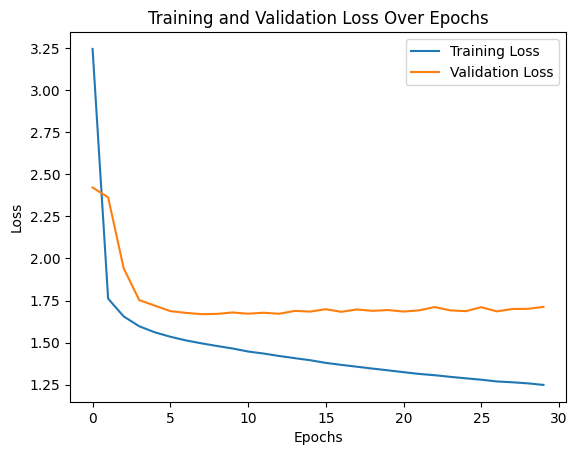

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from your model.fit()

# Access loss and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Add legend
plt.legend()

# Show the plot
plt.show()


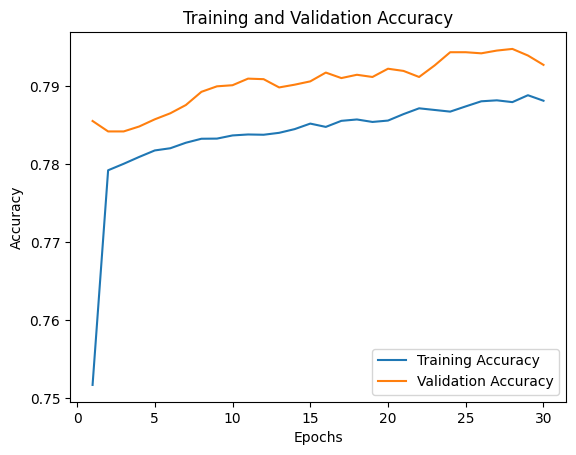

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the recorded training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Assuming 'epochs' contains the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plotting training and validation accuracy
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()  # Display the legend

# Display the plot
plt.show()


In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding (Embedding)       (None, 35, 50)            874550    
                                                                 
 lstm (LSTM)                 [(None, 100),             60400     
                              (None, 100),                       
                              (None, 100)]                       
                                                                 
Total params: 934950 (3.57 MB)
Trainable params: 60400 (235.94 KB)
Non-trainable params: 874550 (3.34 MB)
_________________________________________________________________


In [ ]:
decoder_model = Model([decoder_inputs,encoder_states],decoder_outputs)
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 35, 50)               874550    ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 100)]                0         []                            
                                                                                            

In [ ]:
encoder_model.save('poem_encoder_model.h5')
decoder_model.save('poem_decoder_model.h5')

In [ ]:
seed_text = 'হাতে হাত রেখে পাড়ি দেব বিপ্লবী'
result = seed_text
seed = seed_text
for _ in range(1):
    decode_index = []
    seed = seed
    tokens = tokenizer.word_tokenize(seed)
    encoded_seed = [word_index.get(word, word) for word in tokens]
    max_sequence_length = max_sequence_length
    padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length, padding='post')

    context_vector = encoder_model.predict(padded_seed)

    target_seq = np.zeros((1, max_sequence_length))
    target_seq[0][0] = start_token_id

    stop_condition = False

    it = 0
    pred_line = ''
    while not stop_condition:
        output_tokens = decoder_model.predict([target_seq, context_vector])
        print(output_tokens)
        sampled_token = np.argmax(output_tokens[0, it, :])
        decode_index.append(sampled_token)

        word = [word for word, index in word_index.items() if index == sampled_token][0]
        pred_line += ' ' + word

        print(pred_line)

        if sampled_token == token_id or it == (max_sequence_length - 1):
            stop_condition = True

        target_seq[0][it + 1] = sampled_token
        it += 1

    result += '\n' + pred_line
    seed = pred_line

result


1/1 [==============================] - 0s 32ms/step
[[[2.9350622e-06 1.3394633e-07 1.3573685e-07 ... 1.3191421e-07
   1.4263625e-07 1.1182065e-07]
  [9.3275869e-01 3.1448522e-08 3.1001850e-08 ... 2.7938848e-08
   3.3281772e-08 2.4037570e-08]
  [9.9346304e-01 6.5515509e-09 6.7228489e-09 ... 5.9060672e-09
   7.1176256e-09 5.0432742e-09]
  ...
  [9.9987102e-01 7.7471168e-10 7.6068002e-10 ... 6.9485118e-10
   7.7702617e-10 5.5700966e-10]
  [9.9986875e-01 8.1475116e-10 7.9994850e-10 ... 7.3091794e-10
   8.1716189e-10 5.8614186e-10]
  [9.9986851e-01 8.2021601e-10 8.0528950e-10 ... 7.3585421e-10
   8.2265078e-10 5.9015554e-10]]]
 আমার
1/1 [==============================] - 0s 32ms/step
[[[2.9350622e-06 1.3394633e-07 1.3573685e-07 ... 1.3191421e-07
   1.4263625e-07 1.1182065e-07]
  [7.6637640e-05 2.1919256e-07 2.2627323e-07 ... 2.2012559e-07
   2.3666418e-07 1.9681602e-07]
  [9.9288261e-01 7.1383806e-09 7.0873023e-09 ... 6.2666428e-09
   7.6339068e-09 5.6028617e-09]
  ...
  [9.9986422e-01 8.22

IndexError: list index out of range

In [ ]:
output_tokens.shape
sampled_token = np.argmax(output_tokens[0, 0, :])
output_tokens

array([[[7.8861637e-04, 6.0178991e-08, 5.7957084e-08, ...,
         8.6928743e-08, 5.9218209e-08, 5.9094155e-08],
        [2.8150568e-03, 1.8376376e-07, 1.8922763e-07, ...,
         1.8836178e-07, 1.9454296e-07, 1.9615669e-07],
        [1.7466348e-02, 1.4124451e-07, 1.4428822e-07, ...,
         1.5332823e-07, 1.3575283e-07, 1.4220956e-07],
        ...,
        [9.9987471e-01, 4.1958749e-11, 4.5412635e-11, ...,
         3.1652559e-11, 5.0396711e-11, 5.1393344e-11],
        [9.9987471e-01, 4.1958267e-11, 4.5412115e-11, ...,
         3.1652257e-11, 5.0396038e-11, 5.1392755e-11],
        [9.9987471e-01, 4.1951945e-11, 4.5405707e-11, ...,
         3.1648816e-11, 5.0387867e-11, 5.1384813e-11]]], dtype=float32)

In [ ]:
np.argmax(output_tokens,axis=-1)

array([[12508, 12684, 12508, 12684,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]])

In [ ]:
encoder_model.save('poem_encoder_model.h5')
decoder_model.save('poem_decoder_model.h5')

In [ ]:
seed_text = 'হাতে হাত রেখে পাড়ি দেব বিপ্লবী '
result = seed_text
seed = seed_text
for _ in range (1):
    decode_index = []
    seed = seed
    tokens = tokenizer.word_tokenize(seed)
    encoded_seed = [word_index.get(word, word) for word in tokens]
    max_sequence_length = max_sequence_length
    padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length, padding='post')

    context_vector = encoder_model.predict(padded_seed)

    #print(context_vector)
    #print(len(context_vector))



    target_seq = np.zeros((1, max_sequence_length))
    target_seq[0][0] = start_token_id
    print(target_seq)
    #embedded_target_seq = embedding_layer_weights[target_seq.astype(int)]
    #print(context_vector+[target_seq])


    stop_condition = False

    it =0
    pred_line =' '
    while not stop_condition:
      output_tokens = decoder_model.predict([target_seq,context_vector])
      #print(output_tokens)
      #print(output_tokens)
      output_token =np.argmax(output_tokens,axis=-1)
      print(output_token)
      #target_seq = np.zeros((1, max_sequence_length))
      target_seq[0,it+1]= output_token[0,it]
      print(target_seq)
      #pred_line = ' ' + pred_line

      #print(pred_line)
      print(it)

      decode_index.append(output_token)
      word = [word for word, index in word_index.items() if index == output_token[0][it]][0]

      if((output_token[0][it] == token_id)):
        stop_condition = True
      elif((it == 33)):
        stop_condition = True

      #context_vector = [h,c]
      pred_line = pred_line + ' ' + word
      print(pred_line)

      it +=1

    result = result + '\n' + pred_line
    seed = pred_line

result






1/1 [==============================] - 0s 38ms/step
[[17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
1/1 [==============================] - 0s 52ms/step
[[12508     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]]
[[   17. 12508.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.]]
0
  আমার
1/1 [==============================] - 0s 48ms/step
[[12508  2917     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]

IndexError: list index out of range

In [ ]:
def gen_text(encoder_model,decoder_model,max_sequence_length,tokenizer,word_index,seed_text,num_lines):
    result = seed_text
    seed = seed_text
    for _ in range (num_lines):
      decode_index = []
      seed = seed
      tokens = tokenizer.word_tokenize(seed)
      encoded_seed = [word_index.get(word, word) for word in tokens]
      max_sequence_length = max_sequence_length
      padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length, padding='post')

      context_vector = encoder_model.predict(padded_seed)

      target_seq = np.zeros((1,  max_sequence_length))

      stop_condition = False

      it =0
      pred_line = ' '
      while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + context_vector )
        output_token =np.argmax(output_tokens,axis=-1)
        target_seq[0,it] = output_token

        decode_index.append(output_token)
        word = [word for word, index in word_index.items() if index == output_token[0][0]][0]

        if(output_token ==123 or len(decode_index)==max_sequence_length):
          stop_condition = True

        context_vector = [h,c]
        pred_line = pred_line + ' ' + word

        it +=1

      result = result + '\n' + pred_line
      seed = pred_line

    return result






In [ ]:
text = gen_text(encoder_model,decoder_model,max_sequence_length,tokenizer,word_index,'হাতে হাত রেখে পাড়ি দেব বিপ্লবী উচ্ছ্বসিত দিন',5)

1/1 [==============================] - 1s 791ms/step


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_2' (type Functional).
    
    Layer "lstm_1" expects 7 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'model_2/embedding/embedding_lookup/Identity:0' shape=(None, 35, 100) dtype=float32>]
    
    Call arguments received by layer 'model_2' (type Functional):
      • inputs=('tf.Tensor(shape=(None, 35), dtype=float32)', 'tf.Tensor(shape=(None, 50), dtype=float32)', 'tf.Tensor(shape=(None, 50), dtype=float32)')
      • training=False
      • mask=None


In [ ]:
def generate_text(model, max_sequence_length, tokenizer, word_index, seed_text, num_words):
    result = seed_text
    for _ in range(num_words):
        # Tokenize the seed text
        tokens = tokenizer.word_tokenize(seed_text)
        encoded_seed = [word_index.get(word, word) for word in tokens]

        # Pad the sequence to match the model's input length
        max_sequence_length = max_sequence_length
        padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length-1, padding='post')

        # Predict the next word
        predicted_index = np.argmax(model.predict([padded_seed, padded_seed]), )
        predicted_word = [word for word, index in word_index.items() if index == predicted_index[0][0]][0]

        # Update the seed text for the next iteration
        seed_text += " " + predicted_word
        result += " " + predicted_word

        if predicted_word == 'কবিতাশেষ':
            break

    result = result.replace('লাইনশেষ', '\n')
    result = result.replace('কবিতাশেষ', '...')
    return result


In [ ]:
max_sequence_length

35

In [ ]:
def generate_text(model, max_sequence_length, tokenizer, word_index, seed_text, num_words):
    result = seed_text
    tokenizer = tokenizer
    for _ in range(num_words):
        # Tokenize the seed text
        tokens = tokenizer.word_tokenize(seed_text)
        encoded_seed = [word_index.get(word, word) for word in tokens]

        # Pad the sequence to match the model's input length
        max_sequence_length = max_sequence_length
        padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length-1, padding='pre')

        # Predict the next word
        predicted_index = np.argmax(model.predict([padded_seed, padded_seed]), axis=-1)
        #add
        predicted_index = np.clip(predicted_index, 0, len(word_index))
        predicted_word =[word for word, index in word_index.items() if index == predicted_index[0][0]][0]

        # Update the seed text for the next iteration
        seed_text = seed_text + " " + predicted_word
        result = result + " " + predicted_word

        if predicted_word == 'কবিতাশেষ':
            break

    result = result.replace('লাইনশেষ', '\n')
    result = result.replace('কবিতাশেষ', '...')
    return result


In [ ]:
def generate_text(model, max_sequence_length, tokenizer, word_index, seed_text, num_words):
    result = seed_text
    tokenizer = tokenizer
    for _ in range(num_words):
        # Tokenize the seed text
        tokens = tokenizer.word_tokenize(seed_text)
        encoded_seed = [word_index.get(word, word) for word in tokens]

        # Pad the sequence to match the model's input length
        max_sequence_length = max_sequence_length
        padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length-1, padding='post')

        # Predict the next word
        predicted_index = np.argmax(model.predict([padded_seed,padded_seed]), axis=-1)

    return predicted_index

In [ ]:
 txt = generate_text(model, 36, tokenizer, word_index, 'হাতে হাত রেখে পাড়ি দেব বিপ্লবী উচ্ছ্বসিত দিন', 1)


1/1 [==============================] - 0s 66ms/step


In [ ]:
unpadded_sequence = txt[np.where(txt != 0)]

In [ ]:
unpadded_words = [word for index in unpadded_sequence for word, idx in word_index.items() if idx == index]
unpadded_words

['কাকটা', 'আমার', 'করে', 'করে', 'দেব', 'বিপ্লবী', 'উচ্ছ্বসিত', 'সুখানুভূতি']

In [ ]:
from keras.layers import Layer, Input, Embedding, LSTM, Dense, Concatenate, Bidirectional
from keras.models import Model
from keras.optimizers import Adam
from keras.activations import softmax
from keras.callbacks import ModelCheckpoint, EarlyStopping

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        self.W_q = self.add_weight(name='W_q',
                               shape=(input_shape[0][-1].value, input_shape[1][-1].value),
                               initializer='uniform',
                               trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        assert isinstance(inputs, list)
        decoder_state, encoder_states = inputs

        # Concatenate decoder state with all encoder states along the time axis
        decoder_state = K.expand_dims(decoder_state, axis=1)
        decoder_state = K.repeat_elements(decoder_state, K.shape(encoder_states)[1], axis=1)
        qk_concat = K.concatenate([decoder_state, encoder_states], axis=-1)

        # Ensure proper dimensions for dot product
        qk_concat = K.dot(qk_concat, self.W_q)
        v = encoder_states

        attn_score = K.dot(qk_concat, K.transpose(v))
        attn_score = softmax(attn_score)
        context_vector = K.batch_dot(attn_score, v)

        return context_vector

    def compute_output_shape(self, input_shape):
        assert isinstance(input_shape, list)
        return input_shape[1]

# Assuming you have defined vocab_size, embedding_dim, max_sequence_length, etc.

# Encoder
encoder_inputs = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_layer_weights], trainable=False)
encoder_embedding = embedding_layer(encoder_inputs)

# First Bidirectional LSTM layer in the encoder
encoder_lstm1 = Bidirectional(LSTM(units=50, return_sequences=True, return_state=True))
encoder_outputs1, forward_h1, forward_c1, backward_h1, backward_c1 = encoder_lstm1(encoder_embedding)
encoder_states1 = [forward_h1, forward_c1, backward_h1, backward_c1]

# Second Bidirectional LSTM layer in the encoder
encoder_lstm2 = Bidirectional(LSTM(units=50, return_sequences=True, return_state=True))
encoder_outputs2, forward_h2, forward_c2, backward_h2, backward_c2 = encoder_lstm2(encoder_outputs1)
encoder_states2 = [forward_h2, forward_c2, backward_h2, backward_c2]

# Third Bidirectional LSTM layer in the encoder
encoder_lstm3 = Bidirectional(LSTM(units=50, return_sequences=True, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm3(encoder_outputs2)
encoder_states = [forward_h, forward_c, backward_h, backward_c]

# Attention layer
attention_layer = AttentionLayer()
#context_vector, attention_weights = attention_layer([decoder_state, encoder_states])

# Decoder
decoder_inputs = Input(shape=(max_sequence_length,))
decoder_embedding = embedding_layer(decoder_inputs)
# First LSTM layer in the decoder
decoder_lstm1 = LSTM(units=50, return_sequences=True, return_state=True)
decoder_outputs1, state_h1, _ = decoder_lstm1(decoder_embedding, initial_state=encoder_states[:2])

# Attention layer for the first LSTM layer
context_vector1, attention_weights1 = attention_layer([state_h1, encoder_states])

# Concatenate context vector with decoder output for the first layer
decoder_combined_context1 = Concatenate()([decoder_outputs1, context_vector1])

# Second LSTM layer in the decoder
decoder_lstm2 = LSTM(units=50, return_sequences=True, return_state=True)
decoder_outputs2, state_h2, _ = decoder_lstm2(decoder_combined_context1, initial_state=encoder_states)

# Attention layer for the second LSTM layer
context_vector2, attention_weights2 = attention_layer([state_h2, encoder_states])

# Concatenate context vector with decoder output for the second layer
decoder_combined_context2 = Concatenate()([decoder_outputs2, context_vector2])

# Third LSTM layer in the decoder
decoder_lstm3 = LSTM(units=50, return_sequences=True, return_state=True)
decoder_outputs, state_h3, _ = decoder_lstm3(decoder_combined_context2, initial_state=encoder_states)

# Attention layer for the third LSTM layer
context_vector3, attention_weights3 = attention_layer([state_h3, encoder_states])

# Concatenate context vector with decoder output for the third layer
decoder_combined_context3 = Concatenate()([decoder_outputs, context_vector3])

# Dense layer for output
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context3)


# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model with a specific learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='loss', patience=5)


AttributeError: 'int' object has no attribute 'value'

In [ ]:
# Assuming you have a single dataset: input_sequences, target_sequences, one_hot_target_sequences
# Define callbacks

# Fit the model with teacher forcing and use validation_split
epochs = 50
batch_size = 32

model.fit(
    [input_sequences, target_sequences],
    one_hot_target_sequences,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,  # Adjust the split ratio as needed
    callbacks=[checkpoint, early_stopping]
)


NameError: name 'ModelCheckpoint' is not defined

In [ ]:


# Assuming you have defined the encoder and decoder models

# Encoder Model for Inference
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

# Decoder Model for Inference
decoder_state_input_h = Input(shape=(10,))
decoder_state_input_c = Input(shape=(10,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_inputs_single = Input(shape=(1,))
decoder_embedding = embedding_layer(decoder_inputs_single)

# Apply the LSTM layer with initial states
decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

# Apply the Dense layer
decoder_outputs = decoder_dense(decoder_outputs)

# Decoder Model for Inference
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

# Function to generate a sequence
def generate_sequence(seed_text, max_length=20):
    # Encode the seed text using the encoder model
    seed = seed_text
    tokens = tokenizer.word_tokenize(seed)
    encoded_seed = [word_index.get(word, word) for word in tokens]
    max_sequence_length = 35
    padded_seed = pad_sequences([encoded_seed], maxlen=max_sequence_length, padding='post')

    context_vector = encoder_model.predict(padded_seed)

    # Initialize the target sequence with the start token
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = start_token_id

    generated_sequence = []

    for _ in range(max_length):
        # Predict the next token using the decoder model
        output_tokens, h, c = decoder_model.predict([target_seq] + context_vector)

        # Get the predicted token index
        sampled_token_index = np.argmax(output_tokens)

        print(sampled_token_index)

        # Break the loop if the end token is predicted
        if sampled_token_index == end_token_id:
            break

        # Update the target sequence for the next iteration
        target_seq[0, 0] = sampled_token_index

        # Decode the index to a word and append to the generated sequence
        sampled_word = [word for word, index in word_index.items() if index ==sampled_token_index][0]

        generated_sequence.append(sampled_word)

    return " ".join(generated_sequence)




In [ ]:
# Example usage
seed_text = 'পুরো অস্তিত্ব আজ বিষন্নতার দখলে'
generated_sequence = generate_sequence(seed_text)
print(generated_sequence)

1/1 [==============================] - 0s 399ms/step


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_5' (type Functional).
    
    Layer "lstm_1" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'model_5/embedding/embedding_lookup/Identity:0' shape=(None, 1, 10) dtype=float32>]
    
    Call arguments received by layer 'model_5' (type Functional):
      • inputs=('tf.Tensor(shape=(None, 1), dtype=float32)', 'tf.Tensor(shape=(None, 10), dtype=float32)', 'tf.Tensor(shape=(None, 10), dtype=float32)')
      • training=False
      • mask=None


'hello hello helleo '

In [ ]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text